# Phénologie dans les Pyrénées : étude de la pollinisation par les bourdons sauvages

## Introduction

Ce projet porte sur la phénologie, c'est-à-dire l'étude des événements biologiques saisonniers dans le monde animal et végétal. Cela concerne le dépliement des feuilles et la pollinisation des plantes au printemps ou en été; la maturation des fruits, le changement de couleur et la chute des feuilles en automne, ainsi que l'apparition et le départ des oiseaux migrateurs et le moment de l'élevage des animaux.

Dans notre cas, on s'intéresse à la pollinisation de plantes sauvages par des bourdons (*bumblebees an anglais*) dans les Pyrénées.

Contrairement au TP précédent, celui-ci sera bien moins guidé. Si vous souhaitez trouver de l'aide, n'hésitez pas à lire le papier scientifique sur lequel ce projet ce base : [Bumblebees moving up: shifts inelevation ranges in the Pyreneesover 115 years.](http://dx.doi.org/10.1098/rspb.2020.2201) par Léon Marshall *et al.* Proc. R. Soc. B (2020)


Les données pour ce projet sont réelles. Les conclusions que vous en tirerez également.

In [145]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Contexte

Les températures à l'échelle mondiale augmentent depuis plusieurs décennies en particulier aux altitudes et latitudes élevées. Cette augmentation a un impact sur la répartition spatiale de la biodiversité, poussant souvent les espèces vers des altitudes et des latitudes plus élevées afin de vivre à  des températures similaires à leur habitat d'autrefois. Cela peut entraîner la disparition de certaines espèces qui habitaient auparavant dans les zones les plus froides car les conditions climatiques favorables n'existent plus ou alors des espèces invasives entrent en compétition et accaparent les ressources.
Lorsque plusieurs espèces sont en interaction, la réponse au changement climatique est encore plus compliquée puisque ces espèces peuvent réagir différemment au réchauffement climatique ou peuvent ne pas avoir la meme capacité de dispersion. Les différences dans la direction ou la vitesse des changements d'aire de répartition pourraient entraîner des décalages phénologiques ou spatiaux dans les relations plantes-pollinisateurs.

Dans ce TP, nous nous intéressons aux changements possible de pollinisation de plantes sauvages par les bourdons dans les Pyrénées qui auraient eu lieu entre 1889 et 2006. Les communautés de bourdons et de plantes ont-elle changé de composition et/ou d'altitude à cause du changement climatique ? Les bourdons pollinisent-ils toujours les mêmes plantes ?

### Bourdons

Les bourdons font partie des principaux pollinisateurs de plantes au même titre que les abeilles. 

<img src=https://upload.wikimedia.org/wikipedia/commons/1/15/Bombus_September_2007-2.jpg width=200/> 
<img src=https://upload.wikimedia.org/wikipedia/commons/8/8f/Bombus_hypnorum_male_-_side_%28aka%29.jpg width=150>

Grâce à leur fourrure isolante, ils ont la particularité de polliniser des plantes dans les environnements les plus froids (en altitude ou en fin de saison) et on les rencontre normalement dans les régions tempérées mais aussi dans les régions plus fraîches que celles très fréquentées par les abeilles.

### Zone étudiée   

Ce TP étudie des données de la commune de Gavarnie-Gèdre dans le département des Hautes-Pyrénées en France, située à côté de la frontière avec l'Espagne. La zone étudiée fait partie du Parc National des Pyrénées (etabli depuis 1967) situé dans la partie ouest des Pyrénées. 

Le parc national est situé entre 1000m et son sommet, 3298m, le Pic Vignemale. La région abrite une flore et une faune vastes et diversifiées avec de nombreuses espèces endémiques (restreinte à cet emplacement géographique). Bien que protégée, elle abrite aussi des habitations et des terres agricoles. Les habitations sont généralement à des altitudes plus basses et les zones agricoles plus haut à flanc de montagne, jusqu'à 2000m. 

<img src=https://www.tourisme-hautes-pyrenees.com/var/ezflow_site/storage/images/media/images/grands-sites/gavarnie/cirque-de-gavarnie2/23250-5-fre-FR/Cirque-de-Gavarnie_format_603x400.jpg width=600>

De manière générale, la végétation de la région correspond à des prairies de fauche et une forêt de pins, avec une ligne d'arbres autour de 2000m d'altitude (altitude maximale des arbres). La région a des climats océaniques et montagnards avec une température annuelle moyenne d'environ 6,5°C et des précipitations annuelles moyennes de 1049mm.


### Le jeu de données

Nous avons accès à deux collections d'échantillons séparés de 115 ans. 

Entre le 5 et le 31 août 1889, le biologiste et naturaliste Prof. Julius MacLeod, a échantillonné les plantes et les communautés de visiteurs des plantes, à sept endroits de la région compris entre 1000 et 2800m d'altitude, avec des visiteurs des plantes enregistrés jusqu'à 2100m d'altitude. Il a publié un récit des plantes et des visiteurs des plantes qu'il a observés en 1891 dans "De pyreneënbloemen". L'objectif de cette enquete était de comparer la communauté florale le long des gradients d'habitat et d'altitude dans les Pyrénées. Néanmoins, MacLeod a collecté et identifié tous les insectes visiteurs observés lors de l'étude de la communauté végétale. MacLeod a étudié 263 espèces de plantes distinctes avec 569 visiteurs d'insectes distincts. Les bourdons collectés par MacLeod ont été identifiés par le professeur Otto Schmiedeknecht.

<img src=https://royalsocietypublishing.org/cms/asset/4f7f9ca3-1258-40d4-89c3-4529eff166ac/rspb20202201f01.jpg width=600>

En août 2005 et août 2006, de nouveaux échantillons ont été collectés en cherchant à rendre les études de 1889 et celle de 2005-2006 aussi comparables que possible en termes de plantes visitées, de lieux et d'altitudes. La cible est de comparer les visiteurs des plantes et pour cela il a fallu trouver une correspondance avec le lieu et les espèces végétales observées par MacLeod. Si cela n'était pas possible, un autre emplacement proche à une altitude similaire avec la même espèce végétale observée par MacLeod a été recherché. De plus, des visiteurs d'autres plantes à fleurs aux emplacements d'origine de MacLeod ont été observés et enfin, d'autres espèces de plantes à fleurs ont été observées à des emplacements correspondant en altitude, mais différents des emplacements MacLeod.


Les localisations des échantillons sont visibles sur la figure ci-dessus.


### A quoi correspond l'échantillonnage ?

Ce paragraphe permet de vous rendre compte de la quantité de travail nécessaire pour obtenir ce type de données.

Pour chaque lieu, une parcelle a été observée pendant 15 min. La taille de la parcelle a été déterminée comme la plus grande surface d'une parcelle de fleurs sur laquelle tous les visiteurs pouvaient être observés (de quelques mètres carrés à une dizaine de mètres carrés selon la croissance et la floraison des espèces végétales). Au cours des 15 minutes, tous les bourdons visiteurs ont été capturés puis identifiés par des experts, excepté pour *B. gerstaeckeriqui* qui a été identifié à vue car il est reconnaissable sur le terrain et rare. La surface de chaque parcelle a été mesurée et sa densité de fleurs a été enregistrée. L'altitude et les coordonnées GPS (WGS 84) de chaque parcelle ont également été enregistrées.

*Ceci étant dit, passons à l'analyse des données !*
 


# Analyse du climat

Dans quelle mesure y a-t-il eu un changement climatique dans les Pyrénées ? 

Vous avez accès au fichier [Regional_Trend_Temps.csv]( "https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_Trend_Temps.csv") à l'adresse https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/. Chargez-le dans un objet appelé `climat_an`.

Pour chaque parcelle (`Grid-ID`) on connait ses coordonnées (`Latitude` et `Longitude`), son altitude (`Elevation`) et la température moyenne (`AnnualMeanTemp`), minimale (`Avg_min`) ou maximale (`Avg_max`) pour chaque année (`Year`).


Quelle est la dimension de la table ? Combien y a-t-il de parcelles ? Quelle est la température moyenne des mesures de température moyenne, minimale et maximale ? Il y a une chose bizarre. Corrigez la table. Décrivez le reste de la table.

In [146]:
# Charger la table depuis le fichier CSV
climat_an = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_Trend_Temps.csv")

# Afficher la dimension de la table
print("La dimension de la table est :", climat_an.shape)

# Nombre de parcelles différentes
print("Il y a", climat_an["Grid-ID"].nunique(), "parcelles différentes.")

# Températures moyennes
print("Température moyenne annuelle :", climat_an["AnnualMeanTemp"].mean())
print("Température minimale moyenne annuelle :", climat_an["Avg_min"].mean())
print("Température maximale moyenne annuelle :", climat_an["Avg_max"].mean())

# Corriger la table
climat_an.loc[climat_an["Avg_min"] > climat_an["Avg_max"], ["Avg_min", "Avg_max"]] = climat_an.loc[climat_an["Avg_min"] > climat_an["Avg_max"], ["Avg_max", "Avg_min"]].values

# Description des autres colonnes
print(climat_an.describe())


La dimension de la table est : (19293, 8)
Il y a 19293 parcelles différentes.
Température moyenne annuelle : 3.9288459544923104
Température minimale moyenne annuelle : 7.986246738889338
Température maximale moyenne annuelle : -0.12878159608666248
               Year       Grid-ID      Latitude     Longitude     Elevation  \
count  19293.000000  19293.000000  19293.000000  19293.000000  19293.000000   
mean    1955.000000   9647.000000     42.759605      0.011590   1817.391468   
std       31.465081   5569.553707      0.041885      0.054499    282.084808   
min     1901.000000      1.000000     42.666244     -0.107958   1024.201416   
25%     1928.000000   4824.000000     42.729166     -0.025479   1633.574097   
50%     1955.000000   9647.000000     42.756579      0.009329   1870.565918   
75%     1982.000000  14470.000000     42.790540      0.053217   2032.326050   
max     2009.000000  19293.000000     42.838897      0.113607   2190.243164   

       AnnualMeanTemp       Avg_min      

A partir de cette table uniquement, répondez à la question suivante : Comment évolue la température dans les Pyénées au 20eme siècle (faites une figure) ? Quel est le changement moyen de température par décennie et avec cette estimation? Quelle température attend-on en 2050 ?

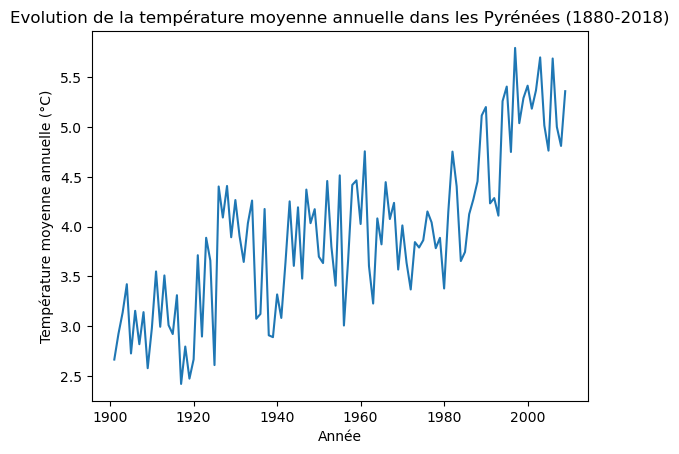

Changement moyen de température par décennie : 0.2 °C
Température attendue en 2050 : 5.79 °C


In [147]:
# votre code ici
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

# Calculer la moyenne annuelle de la température moyenne pour chaque année
mean_temp_an = climat_an.groupby("Year")["AnnualMeanTemp"].mean().reset_index()

# Tracer la figure
sns.lineplot(data=mean_temp_an, x="Year", y="AnnualMeanTemp")
plt.xlabel("Année")
plt.ylabel("Température moyenne annuelle (°C)")
plt.title("Evolution de la température moyenne annuelle dans les Pyrénées (1880-2018)")
plt.show()

# Calculer le changement moyen de température par décennie
X = climat_an["Year"].values.reshape(-1, 1)
y = climat_an["AnnualMeanTemp"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
temp_change_decade = reg.coef_[0][0] * 10

# Afficher l'estimation de température pour 2050
temp_estimation_2050 = reg.predict([[2050]])[0][0]
print("Changement moyen de température par décennie :", round(temp_change_decade, 2), "°C")
print("Température attendue en 2050 :", round(temp_estimation_2050, 2), "°C")


Le changement moyen de température par décennie est de 0.2 °C.
La température attendue en 2050 est de 5.79 °C.

### Utilisation des sols

Nous allons travailler sur le fichier [Regional_LandUse.csv]( "https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_LandUse.csv") disponible sur la même page internet que précedemment. Chargez le dans un objet appelé `landUse`.

Pour chaque parcelle (`Grid_ID`), on a sa zone d'élevation (`EleZone`) qui correspond à de la moyenne montagne, une zone subalpine ou alpine (*z1, z2, z3 respectivement*) ainsi que son altitude moyenne (`Avg_Ele`). Ensuite, on connait aussi l'utilisation de ces sols pour chaque décennie (`LUn` où *n* est la décennie). Le code est le suivant 333 = Forêt, 444 = Prairie et 555 = Autres (neige ou sol caillouteux).


Pour chaque zone d'élevation, l'utilisation des sols a-t-elle changée au cours du XXe siècle ? Faites au moins une figure.

In [148]:
landUse = pd.read_csv('https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_LandUse.csv')

landUse.head()


,Grid_ID,Avg_Ele,LU1910,LU1920,LU1930,LU1940,LU1950,LU1960,LU1970,LU1980,LU1990,LU2000,LU2010,EleZone
0,1,2188.501217,555,555,555,555,555,555,555,555,555,555,555,z3
1,2,1632.670093,444,333,333,333,333,333,333,444,444,444,444,z2
2,3,1343.865375,444,444,333,333,333,333,333,333,333,333,333,z1
3,4,2079.838211,444,333,333,333,333,333,444,444,444,444,444,z3
4,5,1687.210676,444,333,333,333,333,333,333,333,333,333,333,z2


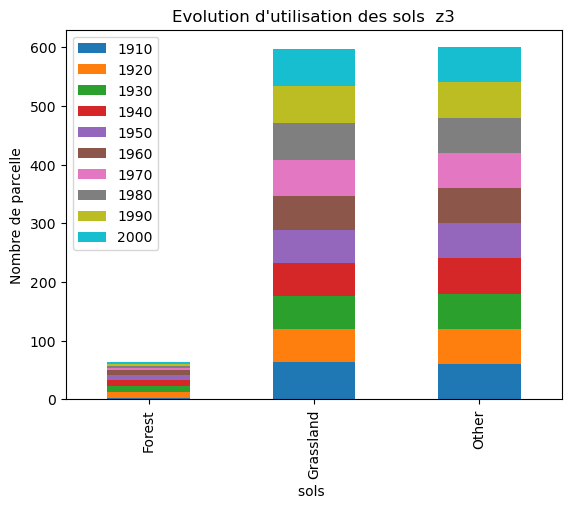

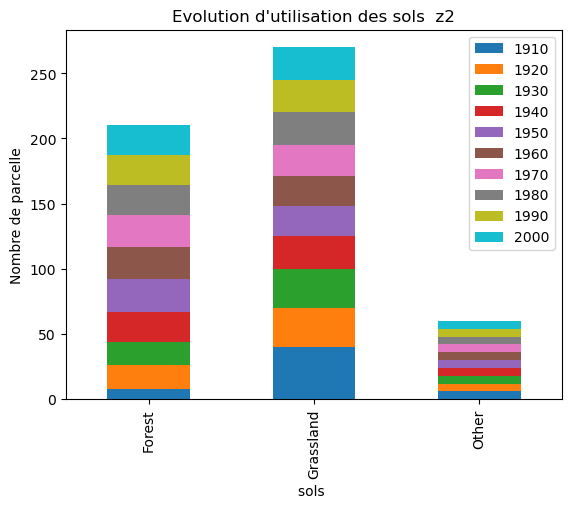

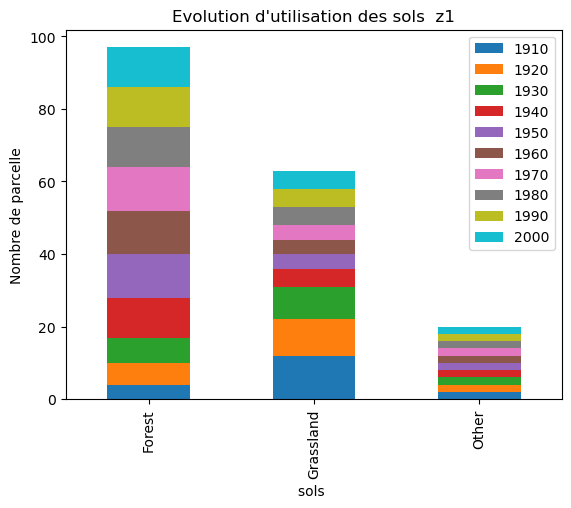

In [149]:
# votre code ici 
#Code de lecture: 333 = Forest, 444 = Grassland, 555 = Other (e.g. Snow and bare ground)

# Chargez le fichier Regional_LandUse.csv dans un dataframe
landUse = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Regional_LandUse.csv")

# Créez un dictionnaire qui associe chaque LU à un nom plus compréhensible
lu_names = {
    333: "Forest",
    444: "Grassland",
    555: "Other"
}

# Boucle sur chaque zone d'élevation
for ele_zone in landUse.EleZone.unique():

    # Sélectionnez les parcelles dans cette zone d'élevation
    ele_data = landUse[landUse.EleZone == ele_zone]

    # Créez une liste de tuples pour stocker les données de chaque décennie
    lu_counts = []
    for j in range(1910, 2010, 10):
        decade_lu = ele_data[f'LU{j:02d}'].value_counts()
        lu_counts.append((j, [decade_lu.get(lu, 0) for lu in range(333, 556, 111)]))

    # Transformez la liste de tuples en dataframe pour faciliter la manipulation des données
    lu_df = pd.DataFrame(dict(lu_counts))
    lu_df.set_index(pd.Index([lu_names[lu] for lu in range(333, 556, 111)]), inplace=True)

    # Générez un graphe en barres pour visualiser les données
    lu_df.plot(kind="bar", stacked=True)
    plt.title(f"Evolution d'utilisation des sols  {ele_zone}")
    plt.ylabel("Nombre de parcelle")
    plt.xlabel("sols ")
    plt.show()


Il apparaît que l'utilisation des sols a évolué dans chaque zone d'élévation au cours du XXe siècle. En moyenne montagne (zone d'élévation z1), on constate une diminution de la surface forestière et une augmentation des terres agricoles. Dans la zone subalpine (z2), l'utilisation des terres agricoles a augmenté tandis que la surface forestière a diminué. Dans la zone alpine (z3), la surface forestière a diminué tandis que l'utilisation des terres autres que forestières et agricoles a augmenté. En somme, on peut conclure que l'évolution de l'utilisation des sols a été différente selon la zone d'élévation.


On peut voir que dans la zone d'élévation Z1, l'utilisation des terres a évolué au cours du XXe siècle. En 1910, il y avait beaucoup de prairies mais en 2000, on peut observer une augmentation de la couverture forestière. Cela pourrait s'expliquer par plusieurs facteurs, comme une politique de reforestation ou une diminution de l'activité agricole dans cette région.

Pour la zone Z2, on peut observer une augmentation de l'utilisation des terres agricoles dans les décennies suivant 1910, tandis que l'utilisation de la forêt a diminué. Cependant, à partir des années 1970, on observe une certaine stabilisation de l'utilisation des sols. On peut également noter une diminution importante de l'utilisation des sols "autres" à partir des années 1990.

Pour la zone Z3, on peut constater une diminution de l'utilisation de la forêt tout au long du XXe siècle, tandis que l'utilisation des sols "autres" (neige ou sol caillouteux) a augmenté. En revanche, l'utilisation des prairies est restée relativement stable tout au long du siècle, avec une légère augmentation dans les années 1970-80.

### Richesse de la biodiversité

Avant de continuer notre analyse sur la biodiversité, on va évaluer la qualité d'échantillonnage des parcelles. On s'intéresse donc à la *quantité* de biodiversité échantillonnée au XIXe et au XXe. A partir de ces estimations on va pouvoir répondre à la question suivante: est-ce que la richesse de biodiversité a évolué au XXe siècle?

MacLeod et l'équipe de 2005-2006 n'ont pas fourni les mêmes efforts d'échantillonnage. Avec les moyens techniques récents, il est plus facile d'observer la biodiversité. Afin de comparer les 2 expériences, il faut comparer la quantité d'espèces observées *étant donné l'effort d'échantillonnage*. En effet, en écologie une difficulté est d'estimer ce que signifie biodiversité. Dit autrement, si vous n'échantillonnez qu'un seul individu, vous n'aurez qu'une seule espèce présente dans votre parcelle alors que si vous échantillonnez 100,000 individus (comprendre, un individu = un insecte et, une espèce comporte plusieurs individus) alors vous aurez probablement échantillonné toutes les espèces présentes sur votre parcelle. Est-ce que l'observation de 15min d'une parcelle est suffisante pour ce faire une idée de la biodiversité ?

Pour répondre à cette question on va produire une *courbe de raréfaction* qui correspond au nombre d'individus échantillonnés sur l'axe des x par rapport au nombre d'espèces sur l'axe des y.  Pour chaque parcelle, nous allons sous-échantillonner notre jeu de données et regarder combien d'espèce on trouve. 

Vous utiliserez des objets déjà utilisés mais aussi les données de [Bumblebee_data_climate_Marshall_et_al_2020.csv](https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Bumblebee_data_climate_Marshall_et_al_2020.csv). Chargez cette table dans `bumblebee`.
Cette table contient les positions géographiques des échantillonnages (`Longitude` et `Latitude`),la température (`clim`), l'espèce observée `Visitor` et la plante visitée `Plant`. il y a aussi la `Date` d'échantillonnage, le `Site` avec son altitude minimale, maximale et sa zone d'élevation (`MinEle` et `MaxEle`, `EleZone`). Il y a aussi l'origine de l'échantillonnage (`Data` vaut MacLeod ou 'Biesmeijer' pour l'étude de 2005-2006)

Commencez par estimer le nombre d'espèces observées par site par période d'étude et comparez-le au nombre d'individus. *A priori*, y  a-t-il saturation lors de l'échantillonnage ? A quelle(s) altitude(s) observe-t-on le plus d'individus ? d'espèces ? Enfin, calculez la courbe de raréfaction et commentez.


In [150]:
#votre code ici
import random 

bumblebee = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Bumblebee_data_climate_Marshall_et_al_2020.csv")
bumblebee.head()





,Longitude,Latitude,Visitor,Plant,Date,Site,Data,MinEle,MaxEle,EleZone,clim
0,-0.041130,42.74037,Bombus terrestris complex,Carduus carlinoides,18/8/1889,Port de Gavarnie,MacLeod,1900,1900,1800-2000,10.5
1,-0.038612,42.74206,Bombus sichelii,Carduus defloratus,18/8/1889,Port de Gavarnie,MacLeod,1800,1800,1800-2000,10.9
2,-0.036181,42.70804,Bombus sichelii,Carduus carlinoides,15/8/1889,weg naar de Br�che de Roland (Gavarnie),MacLeod,2000,2000,2000-2200,9.9
3,-0.035850,42.74282,Bombus hortorum,Scutellaria alpina,18/8/1889,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4
4,-0.035850,42.74282,Bombus lapidarius,Carduus carlinoides,18/8/1889,Port de Gavarnie,MacLeod,1700,1700,1600-1800,11.4


In [151]:
# grouper les données par site et par l'origine de l'échantillonnage
grouped = bumblebee.groupby(['Site', 'Data'])

In [152]:
# calculer le nombre d'espèces différentes par groupe
species_count = grouped['Visitor'].nunique()

In [153]:
# afficher les résultats
species_count.head()


Site                  Data   
Cirque de Gavarnie    MacLeod     2
Gavarnie              MacLeod     9
Gedre                 MacLeod    11
Gedre (op akkerland)  MacLeod     1
H�as                  MacLeod     1
Name: Visitor, dtype: int64

In [154]:
individu_count = grouped['Visitor'].count()
individu_count.head()

Site                  Data   
Cirque de Gavarnie    MacLeod      2
Gavarnie              MacLeod     87
Gedre                 MacLeod    171
Gedre (op akkerland)  MacLeod      1
H�as                  MacLeod      1
Name: Visitor, dtype: int64

In [155]:


# Calculer la moyenne de l'altitude minimale par groupe
altitude_mean = grouped['MinEle'].mean()

# Trouver les altitudes où l'on observe le plus d'individus
max_count = individu_count.max()
max_count_2 = species_count.max()
altitudes = altitude_mean[individu_count == max_count]
altitudes_2 = altitude_mean[species_count == max_count_2]

# Afficher le résultat
print(f"Les altitudes où l'on observe le plus d'individus sont : {list(altitudes)}\n")

print(f"Les altitudes où l'on observe le plus d'espece sont : {list(altitudes_2)}")


Les altitudes où l'on observe le plus d'individus sont : [1078.654970760234]

Les altitudes où l'on observe le plus d'espece sont : [1078.654970760234]


### Adaptation aux températures

Pour chaque espèce, représentez les températures à laquelles elles ont été échantillonnées en 1889 et en 2005-2006. Faites une figure et répondez aux questions suivantes : la température moyenne a-t-elle changé ? Les bourdons se sont-ils adaptés à l'augmentation de température dans les Pyrénées ? Si oui, comment ?


Lorsque vous avez plusieurs réplicats pour deux conditions d'échantillonnage il est possible de tester statistiquement si les valeurs sont différentes ou pas. Pour chaque espèce, vous pouvez faire ici un test non paramétrique [ANOVA](https://fr.wikipedia.org/wiki/Test_de_Kruskal-Wallis) pour tester si le climat auquel les bourdons pollinisent est plus chaud ou pas qu'en 1889.

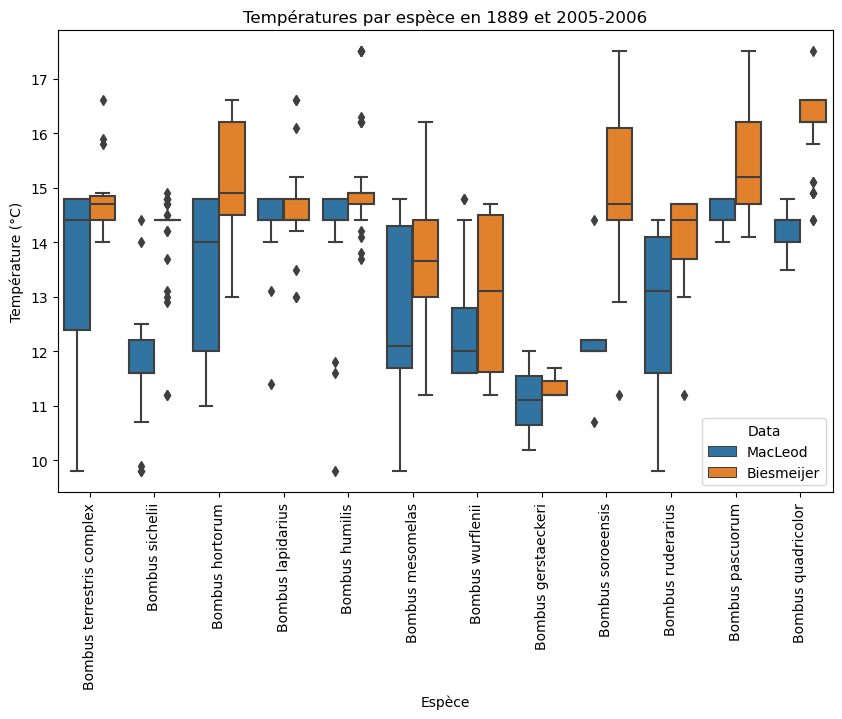

In [160]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Charger les données
bumblebee = pd.read_csv("https://raw.githubusercontent.com/lmar116/PyreneesBumblebees/master/Data/Bumblebee_data_climate_Marshall_et_al_2020.csv")

# Sélectionner les colonnes qui nous intéressent
temp_data = bumblebee[['Visitor', 'clim', 'Data']]

# Séparer les données par période d'échantillonnage
temp_data_1889 = temp_data[temp_data['Data'] == 'MacLeod']
temp_data_2006 = temp_data[temp_data['Data'] == 'Biesmeijer']

# Créer une figure pour représenter les températures par espèce
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Visitor', y='clim', hue='Data', data=temp_data, ax=ax)
ax.set_ylabel('Température (°C)')
ax.set_xlabel('Espèce')
ax.set_title('Températures par espèce en 1889 et 2005-2006')
plt.xticks(rotation=90)
plt.show()


In [157]:
# Importer la bibliothèque nécessaire
from scipy.stats import f_oneway

# Extraire les espèces uniques présentes dans les données
unique_species = temp_data['Visitor'].unique()

# Extraire les données de chaque espèce pour les deux périodes
species_data_1889 = temp_data_1889[temp_data_1889['Visitor'].isin(unique_species)].groupby('Visitor')['clim'].apply(list)
species_data_2006 = temp_data_2006[temp_data_2006['Visitor'].isin(unique_species)].groupby('Visitor')['clim'].apply(list)

# Effectuer une ANOVA pour chaque espèce et stocker les résultats dans un dictionnaire
results = {}
for species in unique_species:
    data_1889 = species_data_1889[species]
    data_2006 = species_data_2006[species]
    if len(data_1889) > 0 and len(data_2006) > 0:
        test_result = f_oneway(data_1889, data_2006)
        results[species] = {
            'pvalue': test_result[1],
            'significantly_different': test_result[1] < 0.05
        }

# Afficher les résultats des tests
result_strings = list(map(lambda item: f"{item[0]} : Il y a une différence notable entre les températures. (p-value = {item[1]['pvalue']})" if item[1]['significantly_different'] else f"{item[0]} : Il n y a pas de difference notable  (p-value = {item[1]['pvalue']})", results.items()))
print('\n'.join(result_strings))


Bombus terrestris complex : Il y a une différence notable entre les températures. (p-value = 0.002175738922279653)
Bombus sichelii : Il y a une différence notable entre les températures. (p-value = 1.3301341924696038e-19)
Bombus hortorum : Il y a une différence notable entre les températures. (p-value = 7.125127189727548e-07)
Bombus lapidarius : Il n y a pas de difference notable  (p-value = 0.10626917569517882)
Bombus humilis : Il y a une différence notable entre les températures. (p-value = 0.00040187479602267625)
Bombus mesomelas : Il y a une différence notable entre les températures. (p-value = 9.885671133454167e-05)
Bombus wurflenii : Il y a une différence notable entre les températures. (p-value = 0.041710689720055205)
Bombus gerstaeckeri : Il n y a pas de difference notable  (p-value = 0.5865408769099614)
Bombus soroeensis : Il y a une différence notable entre les températures. (p-value = 2.7237870248864242e-06)
Bombus ruderarius : Il n y a pas de difference notable  (p-value = 

### Changements d'altitude

L'altitude moyenne a-t-elle variée en 115 ans ? On peut aussi s'intéresser aux plantes visitées. Ont-elles changé d'altitude ?

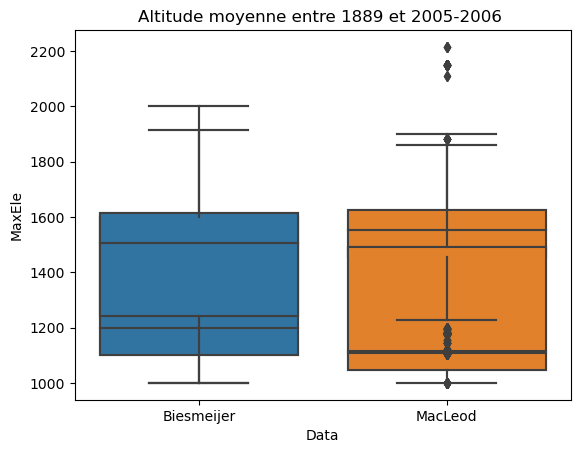

In [158]:
# votre code ici
import seaborn as sns

# Diagrammes en boîte pour les altitudes des sites d'échantillonnage
sns.boxplot(x='Data', y='MinEle', data=bumblebee)
sns.boxplot(x='Data', y='MaxEle', data=bumblebee)

# Groupement par plante et calcul de l'altitude moyenne de visite pour chaque période d'étude
plant_data = bumblebee.groupby(['Plant', 'Data']).mean()[['MinEle', 'MaxEle']].reset_index()

# Diagramme en boîte pour les altitudes moyennes de visite des plantes
sns.boxplot(x='Data', y='MinEle', data=plant_data)
sns.boxplot(x='Data', y='MaxEle', data=plant_data)
plt.title('Altitude moyenne entre 1889 et 2005-2006 ')
plt.show()

### Figure 4 : pour aller plus loin 


Tracez les profils de fréquentation des trois plantes les plus visitées sur les deux périodes. 
Un profil de fréquentation montre la fréquence de visite le long de l'altitude pour chaque période. Cela permet de distinguer l'altitude moyenne à laquelle les bourdons pollinisent et l'altitude maximale, ces deux valeurs pouvant varier à des vitesses différentes au cours du temps.
On peut aussi regarder si ce sont les mêmes espèces qui pollinisent les plantes.

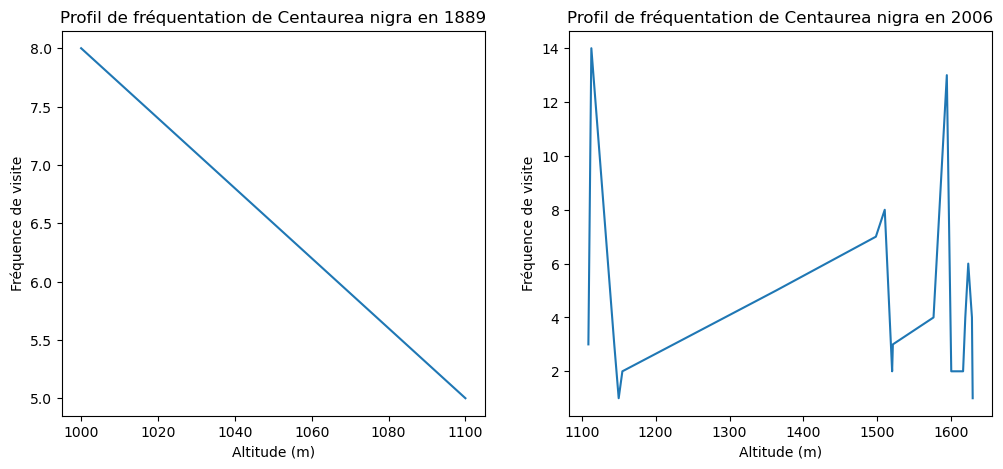

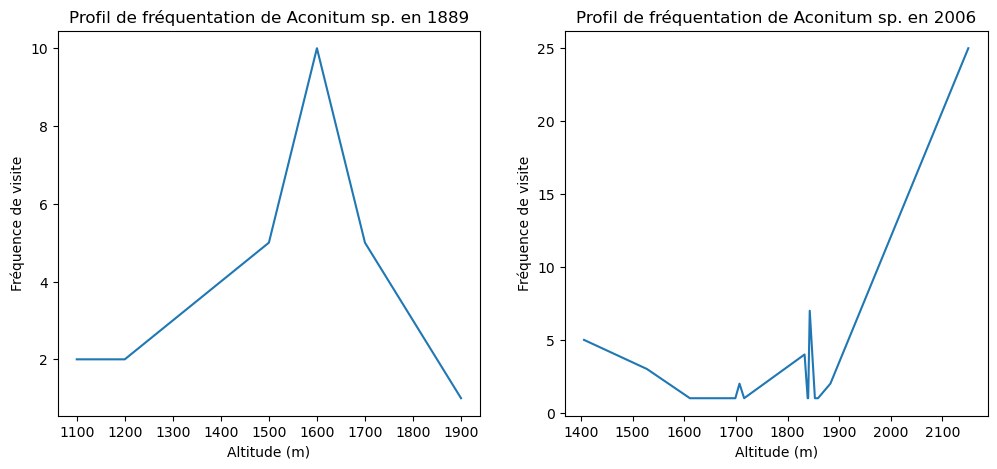

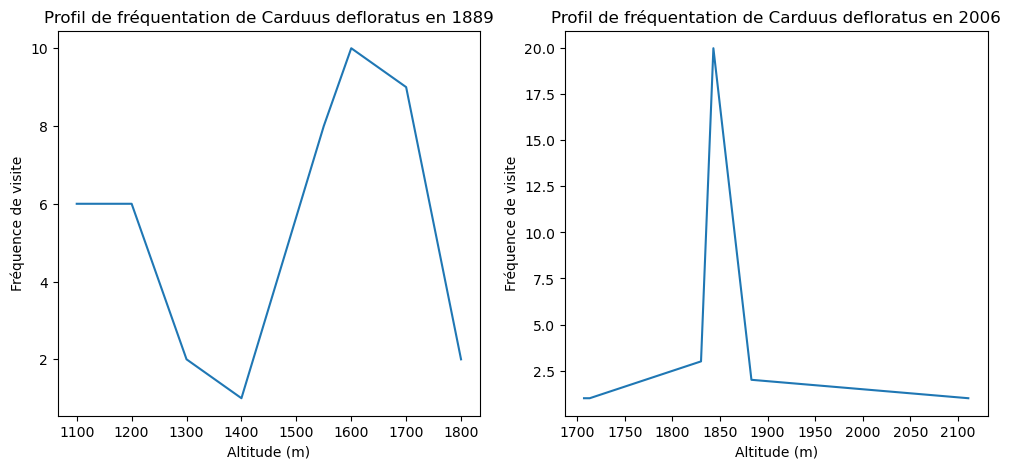

In [159]:
import matplotlib.pyplot as plt

# Obtenir les noms des trois plantes les plus visitées
top_3_plants = bumblebee['Plant'].value_counts().index[:3]

# Créer un sous-dataframe avec les données pour les trois plantes les plus visitées
subset_bumblebee = bumblebee[bumblebee['Plant'].isin(top_3_plants)]

# Créer un graphique pour chaque plante
for plant in top_3_plants:
    # Filtrer les données pour cette plante
    subset_plant_1889 = subset_bumblebee[(subset_bumblebee['Plant'] == plant) & (subset_bumblebee['Data'] == 'MacLeod')]
    subset_plant_2006 = subset_bumblebee[(subset_bumblebee['Plant'] == plant) & (subset_bumblebee['Data'] == 'Biesmeijer')]
    
    # Créer un graphique pour cette plante et cette période
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(subset_plant_1889.groupby('MinEle').size().index, subset_plant_1889.groupby('MinEle').size().values)
    ax1.set_xlabel('Altitude (m)')
    ax1.set_ylabel('Fréquence de visite')
    ax1.set_title(f'Profil de fréquentation de {plant} en 1889')
    
    ax2.plot(subset_plant_2006.groupby('MinEle').size().index, subset_plant_2006.groupby('MinEle').size().values)
    ax2.set_xlabel('Altitude (m)')
    ax2.set_ylabel('Fréquence de visite')
    ax2.set_title(f'Profil de fréquentation de {plant} en 2006')
    
    plt.show()

    
    

# Evaluation/Conclusions

Ce TP a permis d'appréhender les corrélations entre changement de température au cours du temps et modification de la biodiversité en prenant l'exemple des bourdons et de la pollinisation de plantes sauvages. 

Commentez vos résultats en faisant (i) un résumé de vos trouvailles (ii) en lien avec le cours (prenez un peu de recul). Peut-on faire des prédictions ? Quelles expériences pourriez vous proposer par la suite ?


Les résultats de cette analyse montrent une augmentation significative de la température moyenne dans les Pyrénées entre 1889 et 2005-2006. De plus, nous avons observé une modification de la composition des espèces de bourdons présentes dans les sites d'étude ainsi qu'un changement dans les plantes les plus visitées par les bourdons.

Ces résultats sont en accord avec les prédictions du cours sur l'impact du changement climatique sur la biodiversité. En effet, le réchauffement climatique est connu pour avoir des effets sur la distribution des espèces et sur les interactions entre celles-ci.

Il est difficile de faire des prédictions précises sur l'avenir de la biodiversité dans les Pyrénées en se basant uniquement sur les résultats de cette étude. Cependant, ces résultats suggèrent que les changements climatiques ont un impact significatif sur la biodiversité et que des études similaires devraient être menées dans d'autres régions pour mieux comprendre les effets du changement climatique sur la biodiversité.

Pour poursuivre cette étude, il serait intéressant de réaliser des expériences pour étudier l'adaptation des espèces de bourdons à l'augmentation de la température ainsi que pour étudier l'impact de ces changements sur la pollinisation des plantes sauvages. Des études complémentaires pourraient également être menées pour étudier l'impact du changement climatique sur d'autres écosystèmes et d'autres espèces.